# CS 595A - G5 - Project
Written by - Hualiama & Jesus Ferrand\
Last Updated - 4/27/2024

## Import Packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pkg_resources
import os
import csv
import re

from symspellpy import SymSpell, Verbosity
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")

### MatPlotLib Settings

In [67]:
plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

## Pre-Processing

### File Conventions

In [68]:
# Location of Files that need to be analyzed using OCR using relative pathing
InputDirectory = 'Images' # Manually Change
Number_of_Files = len([name for name in os.listdir(InputDirectory)]) # Find files within location and count length

# Find files in this directory 
FileNames_Directory = os.listdir(InputDirectory)

InputDirectoryFolder = InputDirectory + '/'
FileNames_Img = [InputDirectoryFolder + s for s in FileNames_Directory]

In [69]:
# Create empty list of CSV Names
CSVNames = []

# Create CSV Directory Folder
CSVDirectoryString = 'CSV/' # Manually Change
if os.path.exists(CSVDirectoryString):
    pass
else:
    os.mkdir(CSVDirectoryString) # Make a directory using the string provided

# Get Stems (names without extensions) of Input File Names
FileStems = []
for name in FileNames_Directory:
    k = name.rfind('.')
    FileStems.append(name[:k])

# Create CSV File Path using Relative Pathing
for i in range(1,Number_of_Files+1):
    CSVNames.append(CSVDirectoryString+FileStems[i-1] + '_' + str(i) + ".csv")

## Optical Character Recognition

### Load OCR

In [70]:
from paddleocr import PaddleOCR

# Set up ocr with angle corrections using english
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # need to run only once to download and load model into memory

[2024/04/27 15:02:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, shape_info_filename=None, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Owner/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Owner/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_nu

### Execute OCR

In [71]:
# Loop to write data from OCR into CSV files
for j in range(0,Number_of_Files):
    result = ocr.ocr(FileNames_Img[j])
    with open(CSVNames[j], 'w', newline='') as file:
        writer = csv.writer(file)
        for row in result:
            csv_row= []
            for row0 in row[0]:
                csv_row.append(row0[0])
                csv_row.append(row0[1])
            csv_row.append(row[1][0])
            csv_row.append(row[1][1])
            writer.writerow(csv_row)

[2024/04/27 15:02:26] ppocr DEBUG: dt_boxes num : 30, elapse : 0.04494190216064453


[2024/04/27 15:02:26] ppocr DEBUG: cls num  : 30, elapse : 0.07895445823669434
[2024/04/27 15:02:26] ppocr DEBUG: rec_res num  : 30, elapse : 0.05735921859741211
[2024/04/27 15:02:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.031534671783447266
[2024/04/27 15:02:26] ppocr DEBUG: cls num  : 28, elapse : 0.07016825675964355
[2024/04/27 15:02:26] ppocr DEBUG: rec_res num  : 28, elapse : 0.05569624900817871
[2024/04/27 15:02:26] ppocr DEBUG: dt_boxes num : 40, elapse : 0.032247066497802734
[2024/04/27 15:02:26] ppocr DEBUG: cls num  : 40, elapse : 0.10550284385681152
[2024/04/27 15:02:26] ppocr DEBUG: rec_res num  : 40, elapse : 0.08998966217041016
[2024/04/27 15:02:26] ppocr DEBUG: dt_boxes num : 44, elapse : 0.03407788276672363
[2024/04/27 15:02:26] ppocr DEBUG: cls num  : 44, elapse : 0.10118818283081055
[2024/04/27 15:02:27] ppocr DEBUG: rec_res num  : 44, elapse : 0.0933539867401123
[2024/04/27 15:02:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.025746822357177734
[2024/04/27 15:02:

### Load Results and Visualize

In [72]:
from paddleocr import draw_ocr
from PIL import Image

# Defined a function to concatenate the bounding box coordinates back into pairs for draw_ocr
def combine_columns(row):
    return [[row[0], row[1]], [row[2],row[3]], [row[4],row[5]], [row[6],row[7]]]

# Ourput File Directory
OutputDirectoryString = 'Visualized Images/'
if os.path.exists(OutputDirectoryString):
    pass
else:
    os.mkdir(OutputDirectoryString)

# Empty list for Final Output Names
FinalNames = []

# Saves draw_ocr outputs in png format
for i in range(1,Number_of_Files+1):
    FinalNames.append(OutputDirectoryString + FileStems[i-1] + "_" + str(i) + ".png")

# Settings (Draws text and scores onto the outputs in order to visualize bounding boxes)
draw_Text_and_Scores = False

# Pulls corresponding information into draw_ocr, displays resulting image, and saves to output directory
for j in range(0,Number_of_Files):  
    TestCSV = pd.read_csv(CSVNames[j], sep=',',header=None)
    TestCSV['combined'] = TestCSV.apply(combine_columns,axis=1)
    image = Image.open(FileNames_Img[j]).convert('RGB')
    boxes = TestCSV['combined']
    if draw_Text_and_Scores == True:
        txts = TestCSV[8]
        scores = TestCSV[9]
    else:
        txts=None
        scores = None
    im_show = draw_ocr(image, boxes,txts,scores,font_path='Font/simfang.ttf') # Manually Change font 
    im_show = Image.fromarray(im_show)
    im_show.save(FinalNames[j])

# Natural Language Processing

### Find Transactions Statement

In [73]:
#Generate Pandas Dataframe for the bank statement.
directory = os.listdir(CSVDirectoryString)
searchstring = 'Transactions'
for fname in directory:
        if searchstring in fname:
            print('found string in file %s' % fname)
            StatementName = CSVDirectoryString+fname
        else:
            pass

found string in file Transactions_29.csv


## Sort CSV in Western Fashion

In [74]:
#Indexers for text contents.
IdxText = 8
IdxConfidence = 9
with open(StatementName) as FileHandle:
    ReaderHandle = csv.reader(FileHandle, delimiter=',')
    #First, loop through the lines to establish the number of entries.
    #This information will be used to allocate necessary work memory.
    nLine = 0
    for row in ReaderHandle:
        nLine += 1
    print(f'Processed {nLine} lines.')
    xyzPtr = np.zeros((nLine,3),dtype=float) #Will store centroids of AABBs.
    maxX = -100
    StringPtr = []
    
    
    #The reader has traversed the file. To process the lines, the pointer needle needs to be reset.
    FileHandle.seek(0)
    ReaderHandle = csv.reader(FileHandle, delimiter=',')
    
    #T
    nLine = 0
    for row in ReaderHandle:
        #Bottom Left Corner
        x0 = int(float(row[0]))
        y0 = int(float(row[1]))
        #Bottom Right Corner
        x1 = int(float(row[2]))
        y1 = int(float(row[3]))
        #Top Right Corner
        x2 = int(float(row[4]))
        y2 = int(float(row[5]))
        #Top Left Corner
        x3 = int(float(row[6]))
        y3 = int(float(row[7]))
        #Compute XY widths (append to the count of the average).
        #Compute XY centroids.
        xyzPtr[nLine,0] = 0.25*(x0+x1+x2+x3)
        xyzPtr[nLine,1] = 0.25*(y0+y1+y2+y3)
        maxX = max(x0,x1,x2,x3,maxX)
        StringPtr.append(row)
        nLine += 1
    #print(StringPtr)
    print(maxX)
    for ii in range(nLine):
        xyzPtr[ii,2] = maxX*xyzPtr[ii,1] + xyzPtr[ii,0]
    print(xyzPtr)
    SortIdxPtr = np.argsort(xyzPtr[:,2], axis=-1, kind="quicksort")
    print(SortIdxPtr)

Processed 233 lines.
1195
[[3.3000000e+01 1.8000000e+01 2.1543000e+04]
 [1.4500000e+02 1.8000000e+01 2.1655000e+04]
 [4.0700000e+02 1.8000000e+01 2.1917000e+04]
 [8.3000000e+02 1.8000000e+01 2.2340000e+04]
 [9.7100000e+02 1.8000000e+01 2.2481000e+04]
 [1.1755000e+03 1.8000000e+01 2.2685500e+04]
 [3.3000000e+01 4.1500000e+01 4.9625500e+04]
 [1.4450000e+02 4.2000000e+01 5.0334500e+04]
 [2.5250000e+02 4.2000000e+01 5.0442500e+04]
 [4.6250000e+02 4.2000000e+01 5.0652500e+04]
 [8.3000000e+02 4.2000000e+01 5.1020000e+04]
 [9.7100000e+02 4.2000000e+01 5.1161000e+04]
 [1.1705000e+03 4.2500000e+01 5.1958000e+04]
 [3.2500000e+01 6.6500000e+01 7.9500000e+04]
 [1.4450000e+02 6.6500000e+01 7.9612000e+04]
 [2.9450000e+02 6.6000000e+01 7.9164500e+04]
 [5.0900000e+02 6.6000000e+01 7.9379000e+04]
 [8.3050000e+02 6.6500000e+01 8.0298000e+04]
 [9.7150000e+02 6.6500000e+01 8.0439000e+04]
 [1.1700000e+03 6.6500000e+01 8.0637500e+04]
 [3.2000000e+01 9.0000000e+01 1.0758200e+05]
 [1.4450000e+02 9.0000000e+01

## Pull out key information

In [75]:
#Process the Bank statement.
ColIndexLow = 8 #Inclusive index of columns to print.
ColIndexHigh = 9 #Noninclusive index of columns to print.
StrCat = ''

with open(StatementName) as FileHandle:
    ReaderHandle = csv.reader(FileHandle, delimiter=',')
    nLine = 0
    for row in ReaderHandle:
        String = row[ColIndexLow:ColIndexHigh]
        #  print('ORIGINAL:',"".join(String))
        StrCat = StrCat + "_" +  "".join(String)
print(StrCat)
DatePattern = '[0-9][0-9]/[0-9][0-9]'
AmountPattern = '[+-]?[0-9]+\.[0-9]+'

AmountObj = re.compile(AmountPattern)
AmountList = AmountObj.findall(StrCat)
print(AmountList)
DateObj = re.compile(DatePattern)
DateList = DateObj.findall(StrCat)

nAmount = len(AmountList)
nDate = len(DateList)
if 2*nAmount != nDate:
    print("ERROR: There are not as many entries for $ amounts as there are for dates.")

TransactionDatePtr = [DateList[ii] for ii in range(0,nDate,2)]
PostingDatePtr = [DateList[ii] for ii in range(1,nDate,2)]

StatementHandle = pd.DataFrame([TransactionDatePtr,PostingDatePtr,AmountList])
StatementHandle.transpose
print(StatementHandle)

_11/04_11/07_IEREMIAHS ICE - DAYTONA BDAYTONA BEACHFL_9887_9666_5.38_11/04_11/07_IHOP 36221_DAYTONA BEACHFL_9357_9666_20.00_11/04_11/07_SUNOCO 0278924600_DAYTONA BEACHFL_3674_9666_13.54_11/05_11/07_PANDA EXPRESS #2470_DAYTONA BEACHFL_9988_9666_11.18_11/08_11/09_TARGET_00006882_DAYTONA BEACHFL_6816_9666_59.73_11/08_11/09_PANDA EXPRESS #2470_DAYTONA BEACHFL_2494_9666_11.18_11/08_11/09_ERAU VEND CONC_DAYTONA BEACHFL_2501_9996_5.59_11/09_11/10_ERAU STUDENT CTR_DAYTONA BEACHEL_2096_9666_100.00_11/09_11/10_ERAU VEND CONC_DAYTONA BEACHEL_9794_9666_8.73_11/11_11/14_JEREMIAHS ICE - DAYTONA BDAYTONA BEACHFL_7218_9996_5.38_11/11_11/14_SUNOCO 0278924600_DAYTONA BEACHFL_0286_9666_9.25_11/14_11/15_ERAU STUDENT CTR_DAYTONA BEACHFL_9310_9666_100.00_11/18_11/19_ERAU STUDENT CTR_DAYTONA BEACHFL_1000_9996_100.00_11/18_11/21_TARGET_00006882_DAYTONA BEACHEL_2006_9666_49.67_11/18_11/21_SUNOCO 0278924600_DAYTONA BEACHFL_3325_9666_8.36_11/22_11/22_TMOBILE*PREPAID WEB_877-778-2106 WA_9849_9666_11.05_11/22_11/2

In [76]:
sym_spell = SymSpell()
corpus_path = "Dictionary/Dictionary.txt"
sym_spell.create_dictionary(corpus_path)

ColIndexLow = 8 #Inclusive index of columns to print.
ColIndexHigh = 9 #Noninclusive index of columns to print.


FileNameList = CSVNames.copy()
if StatementName in FileNameList:
    FileNameList.remove(StatementName)
else: 
    pass

for StatementName in FileNameList:
    StrCatReceipt = ''
    with open(StatementName) as FileHandle:
        ReaderHandle = csv.reader(FileHandle, delimiter=',')
        nLine = 0
        for row in ReaderHandle:
            String = row[ColIndexLow:ColIndexHigh]
            StrCatReceipt = StrCatReceipt + "".join(String)
            suggestions = sym_spell.lookup("".join(String), Verbosity.CLOSEST, max_edit_distance=2,transfer_casing=False)
            nLine += 1
  
        print(f'Processed {nLine} lines.')
        print(StrCatReceipt)

    ReceiptTotalPattern = 'Total[+-]?[0-9]+\.[0-9]+'
    ReceiptTotalObj = re.compile(ReceiptTotalPattern)
    ReceiptTotalList = ReceiptTotalObj.findall(StrCatReceipt)

    ReceiptTotal1Pattern = 'TOTAL[+-]?[0-9]+\.[0-9]+'
    ReceiptTotal1Obj = re.compile(ReceiptTotal1Pattern)
    ReceiptTotal1List = ReceiptTotalObj.findall(StrCatReceipt)

    ReceiptDatePattern = '[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]'
    ReceiptDateObj = re.compile(ReceiptDatePattern)
    ReceiptDateList = ReceiptDateObj.findall(StrCatReceipt)

    print(ReceiptDateList)
    print(ReceiptTotalList)
    print(ReceiptTotal1List)

Processed 29 lines.
Panda Express #2470Daytona Beach. FL(386)226-199711/5/20228:14:11 PM-TO GO-0rder: 298662Server: Jillian M1 Bigger Plate10.50WHIIE RICE-1/2WHITE RICE-1/2GRILL TERIYAKI CKNORANGE CKNGRILL TERIYAKI CKNSubTotal10.50TAX0.68Total11.18Visa11.18Acct :XXXXXXXX9996AuthCode:068458*Card details belowEMV: Chip RoadAPL: Visa CreditAID: A0000000031010
[]
['Total10.50', 'Total11.18']
['Total10.50', 'Total11.18']
Processed 28 lines.
D/bZ} sSeJQKZ 8pJBdDaytcne Beach. FL(386)225-199711/8/2022 7:58 27 PM-Drive Thru-0rder: 484970Server: Sidney F1 Bigger Plae10.50WHITE RCE-1WHITE RCE-1?GRILL TERIYAKI CKNGRILL TERIVAKJ CKNORANGE CKNSui:Total10.50TAX0.68Tota11.18Visa11.18Acc:t :XxxXXXXX9996Autht`cce::005358xCard cetails belowEMV: Chip ReadAPL: Visa Credi-:AID: A000000003:011:
[]
['Total10.50']
['Total10.50']
Processed 40 lines.
Date: 11/08/202211me: 14:35Transaction #: 6313Register Name: Softball Concessions RP9Cashier ID: 6441Cashier Name: flo keeton 2**********x**************************

# Results

## OCR Accuracy

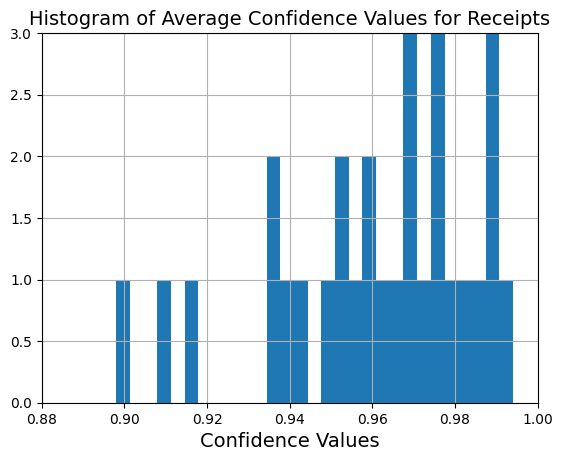

In [77]:
Avg_Confidence = []
i = 0
for i in range(0,Number_of_Files): # subtract 1 to account for statement removal
    File = pd.read_csv(CSVNames[i],sep=',',header=None)
    Confidence = File.iloc[:,-1]
    Average = Confidence.mean()
    Avg_Confidence.append(Average)

Conf_Dataframe = pd.DataFrame(Avg_Confidence).round(3)

BinEdges = np.histogram_bin_edges(Conf_Dataframe,len(Conf_Dataframe))

Conf_Dataframe.hist(bins=BinEdges)
plt.title('Histogram of Average Confidence Values for Receipts')
plt.xlabel('Confidence Values')
plt.axis([0.88, 1.0, 0, 3.0])
plt.savefig('Hist_Conf_Values.png')
plt.show()